In [132]:
import os, sys
import re
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib import rcParams
from mpl_toolkits.axisartist.axislines import Subplot
import pandas as pd
import matplotlib as mpl

#import seaborn as sns

In [15]:
def get_dis(filename):

    accuracies = []
    for line in open(filename, 'r'):
        accuracies.append(float(line.strip()))
    num_iters = len(accuracies)

    hist = np.asarray(accuracies)
    return hist

Text(0.5, 1.0, 'MSEs of Meta-Test Tasks')

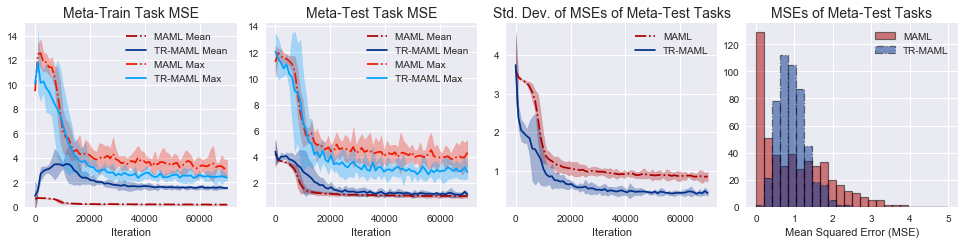

In [245]:
inds = "./logs_sine_drive/iters14.csv"
x = get_dis(inds)
x2 = x
x = np.linspace(0,70000,70)
x2 = np.linspace(0,70000,70)

test_accs = [
"./logs_sine_drive/test_accs_23.csv",  
"./logs_sine_drive/test_accs_24.csv"
]

#*******
# df = pd.read_csv(csv_file)
# saved_column = df['max_loss']
#*******

# NOTE: All filepaths below must be updated for new tests.

# Train mean
maml5_tmean = get_dis("./logs_sine/train_mean650.csv")[0:70]
maml4_tmean = get_dis("./logs_sine/train_mean651.csv")[0:70]
maml3_tmean = get_dis("./logs_sine_drive/train_mean604.csv")[0:70]
maml2_tmean = get_dis("./logs_sine/train_mean653.csv")[0:70]
maml1_tmean = get_dis("./logs_sine/train_mean654.csv")[0:70]

# Train max
maml5_tmax = get_dis("./logs_sine/train_max650.csv")[0:70]
maml4_tmax = get_dis("./logs_sine/train_max651.csv")[0:70]
maml3_tmax = get_dis("./logs_sine_drive/train_max604.csv")[0:70]
maml2_tmax = get_dis("./logs_sine/train_max653.csv")[0:70]
maml1_tmax = get_dis("./logs_sine/train_max654.csv")[0:70]

# Val mean
maml5_vmean = get_dis("./logs_sine/val_mean650.csv")[0:70]
maml4_vmean = get_dis("./logs_sine/val_mean651.csv")[0:70]
maml3_vmean = get_dis("./logs_sine_drive/val_mean604.csv")[0:70]
maml2_vmean = get_dis("./logs_sine/val_mean653.csv")[0:70]
maml1_vmean = get_dis("./logs_sine/val_mean654.csv")[0:70]

# Val max
maml5_vmax = get_dis("./logs_sine/val_max650.csv")[0:70]
maml4_vmax = get_dis("./logs_sine/val_max651.csv")[0:70]
maml3_vmax = get_dis("./logs_sine_drive/val_max604.csv")[0:70]
maml2_vmax = get_dis("./logs_sine/val_max653.csv")[0:70]
maml1_vmax = get_dis("./logs_sine/val_max654.csv")[0:70]

# Val std
maml5_vstd = get_dis("./logs_sine/val_std650.csv")[0:70]
maml4_vstd = get_dis("./logs_sine/val_std651.csv")[0:70]
maml3_vstd = get_dis("./logs_sine_drive/val_std604.csv")[0:70]
maml2_vstd = get_dis("./logs_sine/val_std653.csv")[0:70]
maml1_vstd = get_dis("./logs_sine/val_std654.csv")[0:70]


# Train mean
da3_tmean = get_dis("./logs_sine/train_mean710.csv")[0:70]
da4_tmean = get_dis("./logs_sine/train_mean711.csv")[0:70]
da5_tmean = get_dis("./logs_sine/train_mean712.csv")[0:70]
da2_tmean = get_dis("./logs_sine/train_mean713.csv")[0:70]
da1_tmean = get_dis("./logs_sine/train_mean714.csv")[0:70]

# Train max
da3_tmax = get_dis("./logs_sine/train_max710.csv")[0:70]
da4_tmax = get_dis("./logs_sine/train_max711.csv")[0:70]
da5_tmax = get_dis("./logs_sine/train_max712.csv")[0:70]
da2_tmax = get_dis("./logs_sine/train_max713.csv")[0:70]
da1_tmax = get_dis("./logs_sine/train_max714.csv")[0:70]

# Val mean
da3_vmean = get_dis("./logs_sine/val_mean710.csv")[0:70]
da4_vmean = get_dis("./logs_sine/val_mean711.csv")[0:70]
da5_vmean = get_dis("./logs_sine/val_mean712.csv")[0:70]
da2_vmean = get_dis("./logs_sine/val_mean713.csv")[0:70]
da1_vmean = get_dis("./logs_sine/val_mean278.csv")[0:70]

# Val max
da3_vmax = get_dis("./logs_sine/val_max710.csv")[0:70]
da4_vmax = get_dis("./logs_sine/val_max711.csv")[0:70]
da5_vmax = get_dis("./logs_sine/val_max712.csv")[0:70]
da2_vmax = get_dis("./logs_sine/val_max713.csv")[0:70]
da1_vmax = get_dis("./logs_sine/val_max714.csv")[0:70]

# Val std
da3_vstd = get_dis("./logs_sine/val_std710.csv")[0:70]
da4_vstd = get_dis("./logs_sine/val_std711.csv")[0:70]
da5_vstd = get_dis("./logs_sine/val_std712.csv")[0:70]
da2_vstd = get_dis("./logs_sine/val_std713.csv")[0:70]
da1_vstd = get_dis("./logs_sine/val_std714.csv")[0:70]

inds = x

mpl.style.use('seaborn')
f1 = plt.figure(22, figsize=[13.5,3.5])
plt.clf()
plt.subplot(1,4,1)

m1 = maml1_tmean
m2 = maml2_tmean
m3 = maml3_tmean
m4 = maml4_tmean
m5 = maml5_tmean
tmp = np.concatenate((np.expand_dims(np.asarray(m1),1),np.expand_dims(np.asarray(m2),1)), axis=1)
m = np.concatenate((tmp,np.expand_dims(np.asarray(m3),1)), axis=1)
m = np.concatenate((m,np.expand_dims(np.asarray(m4),1)), axis=1)
m = np.concatenate((m,np.expand_dims(np.asarray(m5),1)), axis=1)
m_mean = np.mean(m,axis=1)
m_95 = 1.96*np.std(m,axis=1)
d1 = da1_tmean
d2 = da2_tmean
d3 = da3_tmean
d4 = da4_tmean
d5 = da5_tmean
tmp = np.concatenate((np.expand_dims(np.asarray(d1),1),np.expand_dims(np.asarray(d2),1)), axis=1)
d = np.concatenate((tmp,np.expand_dims(np.asarray(d3),1)), axis=1)
d = np.concatenate((d,np.expand_dims(np.asarray(d4),1)), axis=1)
d = np.concatenate((d,np.expand_dims(np.asarray(d5),1)), axis=1)
d_mean = np.mean(d,axis=1)
d_95 = 1.96*np.std(d,axis=1)

plt.plot(inds[0:],m_mean[0:], '-.', c='#AC0000', label="MAML Mean")
plt.fill_between(inds[0:], m_mean[0:]-m_95[0:], m_mean[0:]+m_95[0:], color='#AC0000', alpha=0.3)
plt.plot(inds[0:],d_mean[0:],  c='#00318C',label="TR-MAML Mean")
plt.fill_between(inds[0:], d_mean[0:]-d_95[0:], d_mean[0:]+d_95[0:], color='#00318C', alpha=0.3)

m1 = maml1_tmax
m2 = maml2_tmax
m3 = maml3_tmax
m4 = maml4_tmax
m5 = maml5_tmax
tmp = np.concatenate((np.expand_dims(np.asarray(m1),1),np.expand_dims(np.asarray(m2),1)), axis=1)
m = np.concatenate((tmp,np.expand_dims(np.asarray(m3),1)), axis=1)
m = np.concatenate((m,np.expand_dims(np.asarray(m4),1)), axis=1)
m = np.concatenate((m,np.expand_dims(np.asarray(m5),1)), axis=1)
m_mean = np.mean(m,axis=1)
m_95 = 1.96*np.std(m,axis=1)
d1 = da1_tmax
d2 = da2_tmax
d3 = da3_tmax
d4 = da4_tmax
d5 = da5_tmax
tmp = np.concatenate((np.expand_dims(np.asarray(d1),1),np.expand_dims(np.asarray(d2),1)), axis=1)
d = np.concatenate((tmp,np.expand_dims(np.asarray(d3),1)), axis=1)
d = np.concatenate((d,np.expand_dims(np.asarray(d4),1)), axis=1)
d = np.concatenate((d,np.expand_dims(np.asarray(d5),1)), axis=1)
d_mean = np.mean(d,axis=1)
d_95 = 1.96*np.std(d,axis=1)

plt.plot(inds[0:],m_mean[0:], '-.', c='#F11A00', label="MAML Max")
plt.fill_between(inds[1:], m_mean[1:]-m_95[1:], m_mean[1:]+m_95[1:], color='#F11A00', alpha=0.3)
plt.plot(inds[0:],d_mean[0:], c='#00A2FF', label="TR-MAML Max")
plt.fill_between(inds[1:], d_mean[1:]-d_95[1:], d_mean[1:]+d_95[1:], color='#00A2FF', alpha=0.3)

# plt.ylabel('MSE')
plt.xlabel("Iteration")
plt.title("Meta-Train Task MSE", fontsize=14)
plt.legend(loc='best', frameon=False)
plt.tight_layout()
plt.ylim([0,15])

plt.subplot(1,4,2)

m1 = maml1_vmean
m2 = maml2_vmean
m3 = maml3_vmean
m4 = maml4_vmean
m5 = maml5_vmean
tmp = np.concatenate((np.expand_dims(np.asarray(m1),1),np.expand_dims(np.asarray(m2),1)), axis=1)
m = np.concatenate((tmp,np.expand_dims(np.asarray(m3),1)), axis=1)
m = np.concatenate((m,np.expand_dims(np.asarray(m4),1)), axis=1)
m = np.concatenate((m,np.expand_dims(np.asarray(m5),1)), axis=1)

m_mean = np.mean(m,axis=1)
m_95 = 1.96*np.std(m,axis=1)
d1 = da1_vmean
d2 = da2_vmean
d3 = da3_vmean
d4 = da4_vmean
d5 = da5_vmean
tmp = np.concatenate((np.expand_dims(np.asarray(d1),1),np.expand_dims(np.asarray(d2),1)), axis=1)
d = np.concatenate((tmp,np.expand_dims(np.asarray(d3),1)), axis=1)
d = np.concatenate((d,np.expand_dims(np.asarray(d4),1)), axis=1)
d = np.concatenate((d,np.expand_dims(np.asarray(d5),1)), axis=1)
d_mean = np.mean(d,axis=1)
d_95 = 1.96*np.std(d,axis=1)

plt.plot(inds[0:],m_mean[0:], '-.',c='#AC0000', label="MAML Mean")
plt.fill_between(inds[0:], m_mean[0:]-m_95[0:], m_mean[0:]+m_95[0:], color='#AC0000', alpha=0.3)
plt.plot(inds[0:],d_mean[0:],  c='#00318C', label="TR-MAML Mean")
plt.fill_between(inds[0:], d_mean[0:]-d_95[0:], d_mean[0:]+d_95[0:], color='#00318C', alpha=0.3)

m1 = maml1_vmax
m2 = maml2_vmax
m3 = maml3_vmax
m4 = maml4_vmax
m5 = maml5_vmax
tmp = np.concatenate((np.expand_dims(np.asarray(m1),1),np.expand_dims(np.asarray(m2),1)), axis=1)
m = np.concatenate((tmp,np.expand_dims(np.asarray(m3),1)), axis=1)
m = np.concatenate((m,np.expand_dims(np.asarray(m4),1)), axis=1)
m = np.concatenate((m,np.expand_dims(np.asarray(m5),1)), axis=1)
m_mean = np.mean(m,axis=1)
m_95 = 1.96*np.std(m,axis=1)
d1 = da1_vmax
d2 = da2_vmax
d3 = da3_vmax
d4 = da4_vmax
d5 = da5_vmax
tmp = np.concatenate((np.expand_dims(np.asarray(d1),1),np.expand_dims(np.asarray(d2),1)), axis=1)
d = np.concatenate((tmp,np.expand_dims(np.asarray(d3),1)), axis=1)
d = np.concatenate((d,np.expand_dims(np.asarray(d4),1)), axis=1)
d = np.concatenate((d,np.expand_dims(np.asarray(d5),1)), axis=1)
d_mean = np.mean(d,axis=1)
d_95 = 1.96*np.std(d,axis=1)

plt.plot(inds[0:],m_mean[0:], '-.', c='#F11A00', label="MAML Max")
plt.fill_between(inds, m_mean-m_95, m_mean+m_95, color='#F11A00', alpha=0.3)
plt.plot(inds[0:],d_mean[0:],  c='#00A2FF', label="TR-MAML Max")
plt.fill_between(inds, d_mean-d_95, d_mean+d_95, color='#00A2FF', alpha=0.3)

# plt.ylabel('MSE')
plt.xlabel("Iteration")
plt.title("Meta-Test Task MSE", fontsize=14)
plt.legend(loc='best', frameon=False)
plt.tight_layout()
# plt.ylim([0,15])

#-------------------

plt.subplot(1,4,3)
m1 = maml1_vstd
m2 = maml2_vstd
m3 = maml3_vstd
m4 = maml4_vstd
m5 = maml5_vstd
tmp = np.concatenate((np.expand_dims(np.asarray(m1),1),np.expand_dims(np.asarray(m2),1)), axis=1)
m = np.concatenate((tmp,np.expand_dims(np.asarray(m3),1)), axis=1)
m = np.concatenate((m,np.expand_dims(np.asarray(m4),1)), axis=1)
m = np.concatenate((m,np.expand_dims(np.asarray(m5),1)), axis=1)
m_mean = np.mean(m,axis=1)
m_95 = 1.96*np.std(m,axis=1)
d1 = da1_vstd
d2 = da2_vstd
d3 = da3_vstd
d4 = da4_vstd
d5 = da5_vstd
tmp = np.concatenate((np.expand_dims(np.asarray(d1),1),np.expand_dims(np.asarray(d2),1)), axis=1)
d = np.concatenate((tmp,np.expand_dims(np.asarray(d3),1)), axis=1)
d = np.concatenate((d,np.expand_dims(np.asarray(d4),1)), axis=1)
d = np.concatenate((d,np.expand_dims(np.asarray(d5),1)), axis=1)
d_mean = np.mean(d,axis=1)
d_95 = 1.96*np.std(d,axis=1)

plt.plot(inds,m_mean, '-.', c='#AC0000',label="MAML")
plt.fill_between(inds, m_mean-m_95, m_mean+m_95, color='#AC0000', alpha=0.3)
plt.plot(inds,d_mean,  c='#00318C', label="TR-MAML")
plt.fill_between(inds, d_mean-d_95, d_mean+d_95, color='#00318C', alpha=0.3)

# plt.ylabel('Standard Deviation')
plt.xlabel("Iteration")
plt.title("Std. Dev. of MSEs of Meta-Test Tasks", fontsize=14)
plt.legend(loc='best', frameon=False)
plt.tight_layout()

# Test Accs
d = np.sort(np.asarray(get_dis("./logs_sine_drive/test_accs711.csv")))
m = np.sort(np.asarray(get_dis("./logs_sine_drive/test_accs650.csv")))
plt.subplot(1,4,4)
plt.hist(m,bins=np.linspace(0,5,25),alpha=0.5,color='#AC0000',edgecolor='black', linewidth=1.2,ls='-', label='MAML')
plt.hist(d,bins=np.linspace(0,5,25),alpha=0.5,color='#00318C',edgecolor='black', linewidth=1.2,ls='-.', label='TR-MAML')
plt.legend()
plt.xlabel('Mean Squared Error (MSE)')
# plt.ylabel('Number of Tasks')
plt.title('MSEs of Meta-Test Tasks', fontsize=14)
